# Tarea 03 Métodos Computacionales
## Gabriel Cataño Sánchez
### CC: 1039474879

In [160]:
#Este notebook permite analizar los errores en la computación.
#Librerias 
import math as mt
import numpy as np
import matplotlib.pylab as plt 

## Cancelación sustractiva



**serieSn**. Un ejemplo de la cancelacion substractiva es en la suma de series alternantes. Considere la serie $\mathrm{S}_N$,  escrita  matematicamente de tres formas diferentes:

- 
\begin{equation}
\mathrm{S}_N^{(1)} = \sum_{n = 1}^{2N} (-1)^n \frac{n}{n+1} 
\end{equation}

- Sumando números pares e impares.

\begin{equation}
\mathrm{S}_N^{(2)} = -\sum_{n = 1}^{N}\frac{2n-1}{2n} + \sum_{n=1}^{N} \frac{2n}{2n+1}
\end{equation}

- Combinando las series de una forma analítica

\begin{equation}
\mathrm{S}_N^{(3)} = \sum_{n = 1}^{N}\frac{1}{2n(2n+1)}
\end{equation}



Las tres sumas $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$ son matemáticamente iguales, pero los resultados  pueden tener resultados numéricos diferentes.


- Escribir un programa que realice el cálculo de $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$
- Estudiar la convergencia de la serie para los tres casos.
- Considere  que $S_N^{(3)}$ es la solución exacta, realizar dos graficos log-log, del error relativo en función 
del número de términos ($\mathrm{Log_{10}} E$ VS $\mathrm{Log_{10}} N$), para $S_N^{(1)}$ y $S_N^{(2)}$. Donde,  $E = |(S_N^{(i)} - S_N^{(3)})/S_N^{(3)}|$, i = 1, 2. Considere valores de $N = 1\times 10^{6}$.
- Analizar y discutir los resultados. Tenga en cuenta la discusión realizada sobre teoría de errores en la página 
39 del libro del libro [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)

In [161]:
#Definición de funciones para hallar ell valor de cada serie
#Serie base, luego se va a tomar esta serie como la exacta
def serie(n):
    
    """
        Función de sumatoria de una serie de números.

        Parametros
        ------------

        n: Número que determina el límite de la sumatoria.

        Retorno
        ------------

        Ser : Valor de la serie en el valor ingresado 

    """
    
    ser = 0
    for i in range(1,int(n)):
        num = 1
        den = 2*i*(2*i + 1)
        ser = ser + num/den
    return ser

#Serie alternante
def serie1(n):
    ser = 0
    for i in range(1,int(n)):
        num = ((-1) ** i) * i
        den = (i + 1)
        ser = ser + num/den
    return ser

#Serie de de nímeros impares
def seriea(n):
    ser = 0
    for i in range(1,int(n)):
        num = (2*i - 1)
        den = 2*i
        ser = ser + num/den
    return ser

#Serie de números pares
def serieb(n):
    ser = 0
    for i in range(1,int(n)):
        num = 2*i
        den = (2*i + 1)
        ser = ser + num/den
    return ser

#Sumatoria de las series de números impares y pares
def serie2(n):
    return serieb(n) - seriea(n)

#Combinación analítica de las series
def serie3(n):
    ser = 0
    for i in range(1,int(n)):
        num = 1
        den = 2*i*(2*i + 1)
        ser = ser + num/den
    return ser

In [162]:
#Calculo de la sumatoria para todas las series en un n determinado.
n = 1000
print('Valor de la serie con el método 1: ',serie1(n))
print('Valor de la serie con el método 2: ',serie2(n))
print('Valor de la serie con el método 3: ',serie3(n))

Valor de la serie con el método 1:  -0.6926474305598229
Valor de la serie con el método 2:  0.3066027569383323
Valor de la serie con el método 3:  0.3066027569400623


## $2.$ Convergencia de las Series

In [163]:
#Definición de acumulación de las series para posteriormente graficar
N = np.arange(1, 20)

ser_1 = np.zeros(len(N))
ser_2 = np.zeros(len(N))
ser_3 = np.zeros(len(N))

for i, n in enumerate(N):
    

    ser_1[i] = serie1(n = n)
    ser_2[i] = serie2(n = n)
    ser_3[i] = serie3(n = n)

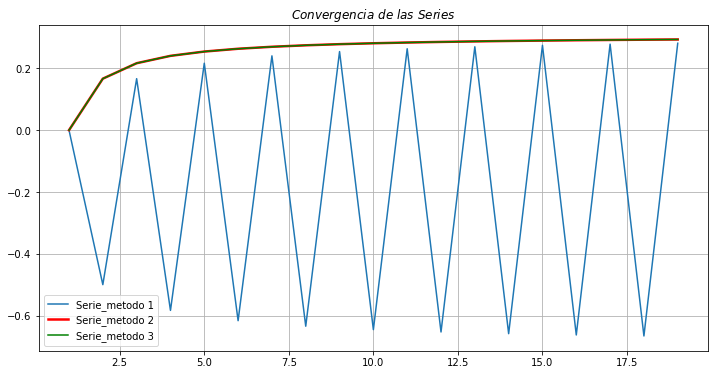

In [164]:
#Gráfica de la convergencia de las series
plt.figure(figsize=(12,6))
plt.plot(N,ser_1, label="Serie_metodo 1")
plt.plot(N,ser_2, 'r', linewidth = 2.5,label="Serie_metodo 2")
plt.plot(N,ser_3, 'g', linewidth = 1.5,label="Serie_metodo 3")
plt.title('$Convergencia$ $de$ $las$ $Series$')
plt.grid()
plt.legend()

In [165]:
N = np.arange(1, 1e6, 50000)
ser1 = np.zeros(len(N))
ser2 = np.zeros(len(N))
ser3 = np.zeros(len(N))

for i, n in enumerate(N):
    

    ser1[i] = serie1(n = n)
    ser2[i] = serie2(n = n)
    ser3[i] = serie3(n = n)
    
err1  = abs(ser1 - ser3)/ser3
err2  = abs(ser2 - ser3)/ser3


<ipython-input-165-eb8e731bb37e>:13: RuntimeWarning: invalid value encountered in true_divide
  err1  = abs(ser1 - ser3)/ser3
<ipython-input-165-eb8e731bb37e>:14: RuntimeWarning: invalid value encountered in true_divide
  err2  = abs(ser2 - ser3)/ser3


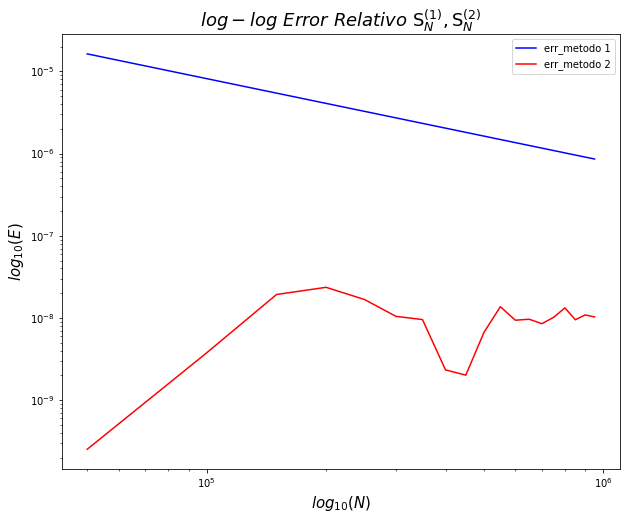

In [166]:
plt.figure(figsize=(10,8))
plt.loglog((N), err1, 'b',label="err_metodo 1")
plt.loglog((N), err2, 'r',label="err_metodo 2")
plt.xlabel("$log_{10}(N)$", fontsize = 15)
plt.ylabel("$log_{10}(E)$", fontsize = 15)
plt.title('$log-log$ $Error$ $Relativo$ $\mathrm{S}_N^{(1)},\mathrm{S}_N^{(2)}$', fontsize = 18)
plt.legend()
plt.show()

Se pudo ver, de las gráficas de convergencia de las series y de la gráfica de error relativo, que $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$, convergen juntas a un valor determinado de una manera rápida, por el contrario, la serie $\mathrm{S}_N^{(1)}$, no tiene un valor de convergencia, pues fluctua entre valores positivos y negativos.\
En los errores relativos con respecto a $\mathrm{S}_N^{(3)}$ que se consideró como exacta, se ve en la gráfica que  $\mathrm{S}_N^{(2)}$ tiene un error relativo que comienza desde un valor pequeño yaumenta hasta llegar a un valor del orden de ~$ 10^{-8}$ en valores muy grandes de la sumatoria, mientras que $\mathrm{S}_N^{(1)}$, tiene un error relativo que es considerable, pero disminuye a medida que se aumenta $N$ a valores grandes.

## **Errores de redondeo**. Caos numérico en un mapa logístico y errores de punto flotante (Errores de redondeo)

> Un ejemplo clásico de caos,  es el comportamiento no lineal en las interaciones de un mapa logistico 

\begin{equation}
x_{n+1}=f(x_n)=rx_n(1-x_n)
\end{equation}

> con $x\in (0,1)$ y $r\in(0,4)$ se pueden producir varios comportamientos sorprendentes.


> ### Problema: 
Encontrar tres formas diferentes de expresar $f(x)$  y calcular la evolución de la misma condición inicial después de cientos de iteraciones. Para este problema, será extremadamente útil  ver sus resultados gráficamente; construya listas de números y llame la libreria matplotlib. 


>#### Hint: valores numéricos de r y x0 que puede tomar:


```python
    >>> r = [1.9, 2.9, 3.1, 3.5, 3.9]

    >>> x0 = 0.6 # any number in [0,1] will do here

    >>> numpoints = 100
       ```


## Solución

In [167]:
#Definición de las función en 3 diferentes formas formas
#Función Base
def f(x,r):
    
    """
    Función de caos poblacional

    Parámetros
    -----------
    x : Valor inicial de la poblacón
    r : Tasa de crecimiento

    Retorno
    -----------
    x : Población final
    """
    
    return r * x * (1 -x)

#Primera forma: función base
def f1(x,r):
    return r * x * (1 -x)

#Segunda forma: integro el x al paréntesis
def f2(x,r):
    return r * (x - x**2)

#Tercera forma: destrucción del parentésis
def f3(x,r):
    return r * x - r * x**2

In [168]:
# Condiciones iniciales
#Tomaremos x fijo y cambiaremos r, para el primer caso r=0.9
# x se puede variar en el intérvalo (0,1)
# r se puede variar en el intervalo (0,4)
xi = 0.6
r  = 0.9
#Número de iterecciones
Ntiempos = 100
N = np.arange(0, Ntiempos, 1)

#Lista vacía a la que se le agregará los valores de x dependiendo de la iteracción
#Lista de valores para x,r evaluados en la primera función 
poblacion1 = []  #Lista vacia
for i in range(0, Ntiempos):
    xn = f1(xi, r)
    xi = xn
    poblacion1.append(xn)

#Lista de valores para x,r evaluados en la segunda función 
poblacion2 = []  #Lista vacia
for i in range(0, Ntiempos):
    xn = f2(xi, r)
    xi = xn
    poblacion2.append(xn)
    
#Lista de valores para x,r evaluados en la tercera función 
poblacion3 = []  #Lista vacia
for i in range(0, Ntiempos):
    xn = f3(xi, r)
    xi = xn
    poblacion3.append(xn)


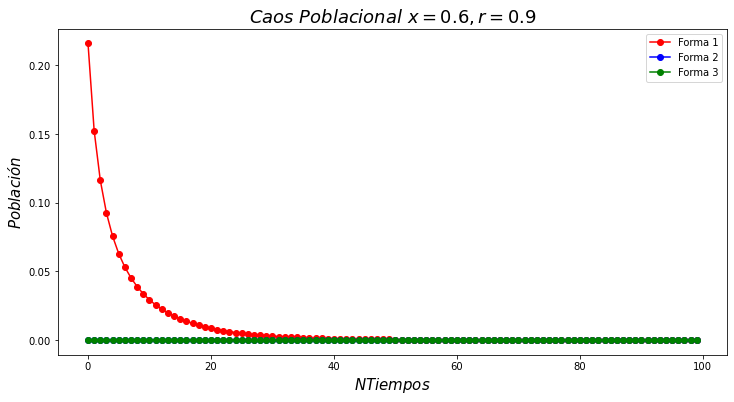

In [169]:
#Gráfica de las 3 listas creadas contra el número de iteracciones
plt.figure(figsize=(12,6))
plt.plot(N, poblacion1, "ro-", label = 'Forma 1')
plt.plot(N, poblacion2, "bo-", label = 'Forma 2')
plt.plot(N, poblacion3, "go-", label = 'Forma 3')
plt.xlabel("$N Tiempos$", fontsize=15)
plt.ylabel("$Población$", fontsize=15)
plt.title('$Caos$ $Poblacional$ $x = 0.6 ,r = 0.9$', fontsize=18)
plt.legend()

In [170]:
#Para el segundo caso, r=1.9
xi = 0.6
r  = 1.9
Ntiempos = 100
N = np.arange(0, Ntiempos, 1)

#Lista de valores para x,r evaluados en la primera función 
poblacion1 = []  #Lista vacia
for i in range(0, Ntiempos):
    xn = f1(xi, r)
    xi = xn
    poblacion1.append(xn)
    
#Lista de valores para x,r evaluados en la segunda función 
poblacion2 = []  #Lista vacia
for i in range(0, Ntiempos):
    xn = f2(xi, r)
    xi = xn
    poblacion2.append(xn)
    
#Lista de valores para x,r evaluados en la tercera función 
poblacion3 = []  #Lista vacia
for i in range(0, Ntiempos):
    xn = f3(xi, r)
    xi = xn
    poblacion3.append(xn)

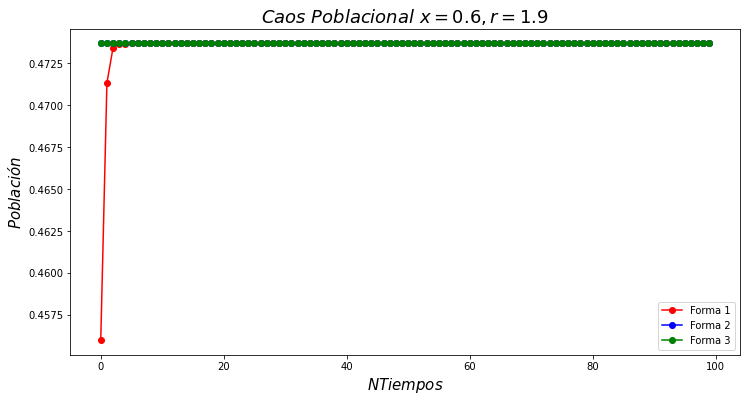

In [171]:
#Gráfica de las listas creadas contra el número de iteracciones
plt.figure(figsize=(12,6))
plt.plot(N, poblacion1, "ro-", label = 'Forma 1')
plt.plot(N, poblacion2, "bo-", label = 'Forma 2')
plt.plot(N, poblacion3, "go-", label = 'Forma 3')
plt.xlabel("$N Tiempos$", fontsize=15)
plt.ylabel("$Población$", fontsize=15)
plt.title('$Caos$ $Poblacional$ $x = 0.6 ,r = 1.9$', fontsize=18)
plt.legend()

In [172]:
#Para el tercer caso, r=2.9
xi = 0.6
r  = 2.9
Ntiempos = 100
N = np.arange(0, Ntiempos, 1)

#Lista de valores para x,r evaluados en la primera función 
poblacion1 = []  #Lista vacia
for i in range(0, Ntiempos):
    xn = f1(xi, r)
    xi = xn
    poblacion1.append(xn)
    
#Lista de valores para x,r evaluados en la segunda función 
poblacion2 = []  #Lista vacia
for i in range(0, Ntiempos):
    xn = f2(xi, r)
    xi = xn
    poblacion2.append(xn)
    
#Lista de valores para x,r evaluados en la tercera función 
poblacion3 = []  #Lista vacia
for i in range(0, Ntiempos):
    xn = f3(xi, r)
    xi = xn
    poblacion3.append(xn)

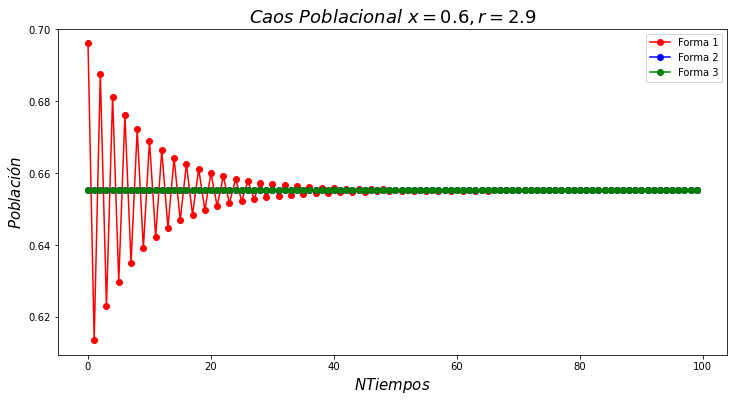

In [173]:
#Gráfica de las listas creadas contra el número de iteracciones
plt.figure(figsize=(12,6))
plt.plot(N, poblacion1, "ro-", label = 'Forma 1')
plt.plot(N, poblacion2, "bo-", label = 'Forma 2')
plt.plot(N, poblacion3, "go-", label = 'Forma 3')
plt.xlabel("$N Tiempos$", fontsize=15)
plt.ylabel("$Población$", fontsize=15)
plt.title('$Caos$ $Poblacional$ $x = 0.6 ,r = 2.9$', fontsize=18)
plt.legend()

In [174]:
#Para el cuarto caso, r=3.9
xi = 0.6
r  = 3.9
Ntiempos = 100
N = np.arange(0, Ntiempos, 1)

#Lista de valores para x,r evaluados en la primera función 
poblacion1 = []  #Lista vacia
for i in range(0, Ntiempos):
    xn = f1(xi, r)
    xi = xn
    poblacion1.append(xn)

#Lista de valores para x,r evaluados en la segunda función     
poblacion2 = []  #Lista vacia
for i in range(0, Ntiempos):
    xn = f2(xi, r)
    xi = xn
    poblacion2.append(xn)
    
#Lista de valores para x,r evaluados en la tercera función 
poblacion3 = []  #Lista vacia
for i in range(0, Ntiempos):
    xn = f3(xi, r)
    xi = xn
    poblacion3.append(xn)

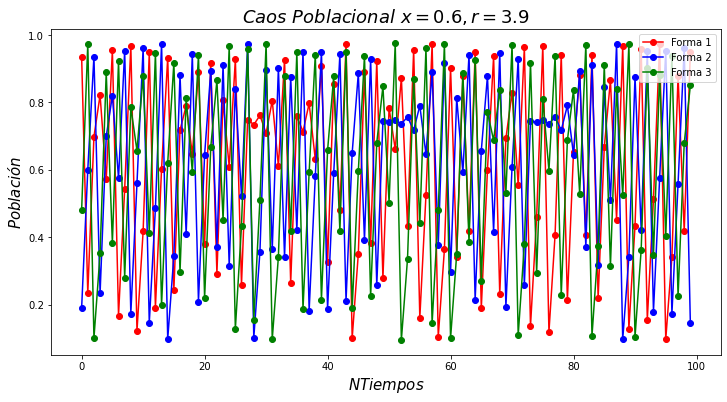

In [175]:
#Gráfica de las tres listas contra el número de iteracciones
plt.figure(figsize=(12,6))
plt.plot(N, poblacion1, "ro-", label = 'Forma 1')
plt.plot(N, poblacion2, "bo-", label = 'Forma 2')
plt.plot(N, poblacion3, "go-", label = 'Forma 3')
plt.xlabel("$N Tiempos$", fontsize=15)
plt.ylabel("$Población$", fontsize=15)
plt.title('$Caos$ $Poblacional$ $x = 0.6 ,r = 3.9$', fontsize=18)
plt.legend(loc = 'upper right')

- $\textbf{Funciones}$:
\begin{equation}
f(x_i)= rx_i (1 - x_i)  
\end{equation}
\begin{equation}
f(x_i)= r(x_i - x_i^{2})       
\end{equation}
\begin{equation}
f(x_i)= rx_i - rx_i^{2}   
\end{equation}
De los valores asignados para $x_i$ y $r$, observamos como a medida que aumenamos $r$, la primera función demora más en converger, cunado $r$ es pequeño, la primera función converge con muchas iteraciones, las demás funciones convergen al valor desde las primeras iteracciones. Cuando $r$ se aproxima a $4$, las tres funciones se convierten en un caos y no convergen a algun valor.